# DTSA 5510 Unsupervised Algorithms in Machine Learning Final Project

In this project we will explore the U.S. News and World Report’s College Data Set. It contains statistics from multiple US colleges from 1995. It comes from the "ISLR" R package. This will be read in as a data frame with 777 observations (or colleges) on 18 variables (or features), including number of applications received, number of applications accepted, number of students enrolled, tuition, and more. This data contains a label for each college, private or public. We will predict these labels using various unsupervised learning methods, using the variables provided.

In [68]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
# Read in and preview the data
df = pd.read_csv("/kaggle/input/college/College.csv")
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Next we'll do some exploratory data analysis. Let's look at scatter plots and histograms of the various features.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


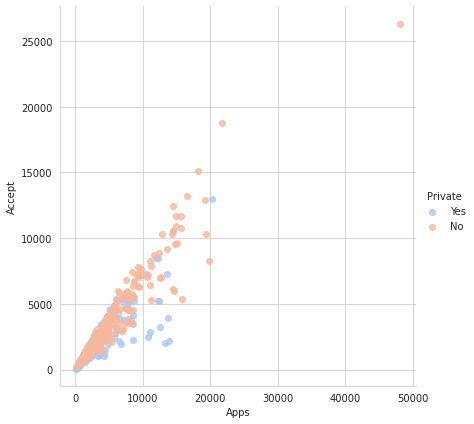

In [70]:
# Scatterplot of applications versus acceptance numbers for private vs public
sns.set_style('whitegrid')
sns.lmplot('Apps','Accept',data=df, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


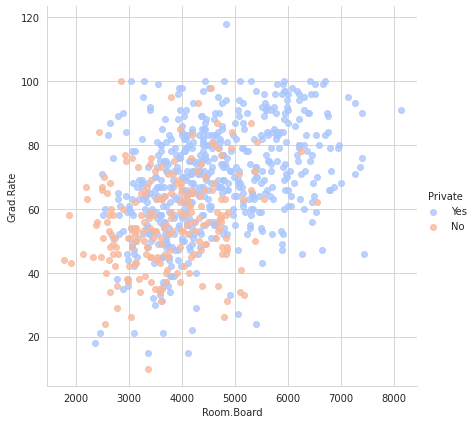

In [71]:
# Scatterplot of room and board versus grad rate numbers for private vs public
sns.set_style('whitegrid')
sns.lmplot('Room.Board','Grad.Rate',data=df, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

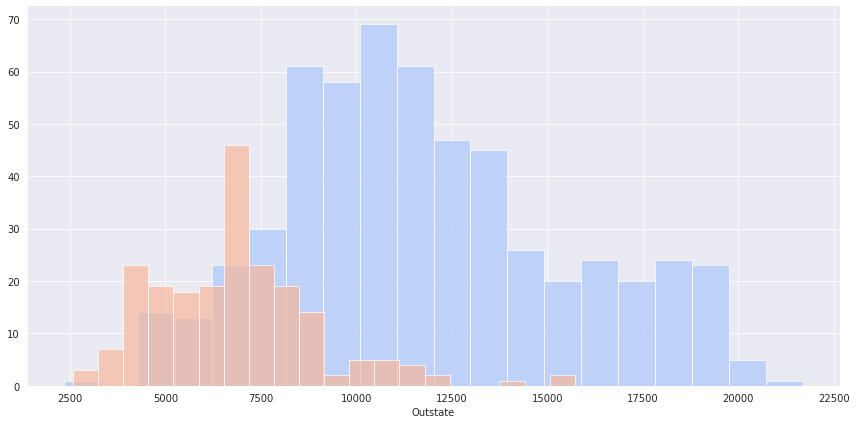

In [72]:
# Histogram of out of state tuition private vs public
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

Based on this quick look, there are definitely trends/information we can use here to predict the private/public label. Next we will look at correlation between features.

<AxesSubplot:>

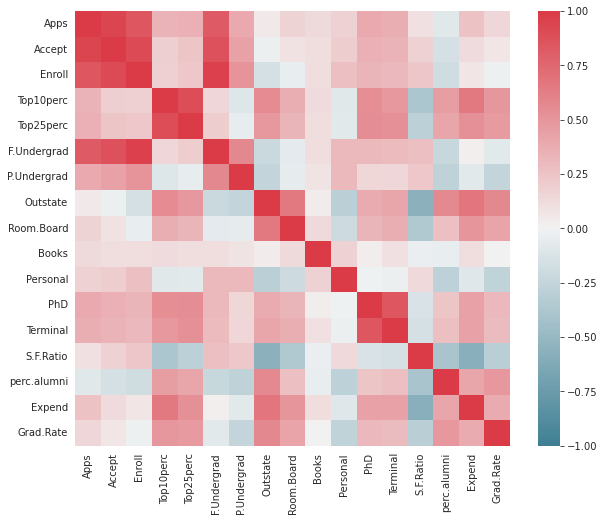

In [73]:
# Compute and visualize correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

It does appear that some features are correlated, such as out of state tuition and room and board, but nothing too much to be concerned about for now. We will keep all features to start. It does not appear that the data needs any transformation. Based on the previous scatter plots, there does appear to be some cleaning of the data required. For example, some schools are reporting a graduation rate higher than 100%, which doesn't make sense. Let's set that to 100.

In [81]:
# Clean data
df[df['Grad.Rate'] > 100] = 100
df[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


Now that we've done some EDA and cleaned the data, we can start on our unsupervised learning models to predict the label, private vs public. We will start with clustering methods.

In [85]:
# Implement k means clustering
kmeans = KMeans(n_clusters=2, random_state = 5)
kmeans.fit(df.drop(['Unnamed: 0','Private'],axis=1))

# True labels
def convert(label):
    if label=='Yes':
        return 1
    else:
        return 0
df['Labels'] = df['Private'].apply(convert)

# Compute accuracy, confusion matrix, and classification report
print(accuracy_score(df['Labels'],kmeans.labels_))
print(confusion_matrix(df['Labels'],kmeans.labels_))
print(classification_report(df['Labels'],kmeans.labels_))

0.7773487773487774
[[ 74 139]
 [ 34 530]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       213
           1       0.79      0.94      0.86       564

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [103]:
# Implement Agglomerative clustering
aggmodel = AgglomerativeClustering(n_clusters=2)
aggmodel.fit(df.drop(['Unnamed: 0','Private'],axis=1))

# Compute accuracy, confusion matrix, and classification report
print(accuracy_score(df['Labels'],aggmodel.labels_))
print(confusion_matrix(df['Labels'],aggmodel.labels_))
print(classification_report(df['Labels'],aggmodel.labels_))

0.10296010296010295
[[ 69 144]
 [553  11]]
              precision    recall  f1-score   support

           0       0.11      0.32      0.17       213
           1       0.07      0.02      0.03       564

    accuracy                           0.10       777
   macro avg       0.09      0.17      0.10       777
weighted avg       0.08      0.10      0.07       777



It appears in our initial look, that our k means model has done fairly well in terms of accuracy and inspection of the confusion matrix. The agglomerative model however, has not done so well. Let's try k means with a different inputs, and see if the performance changes.

In [106]:
# Implement k means clustering
kmeans = KMeans(n_clusters=2, random_state = 5, init="random")
kmeans.fit(df.drop(['Unnamed: 0','Private'],axis=1))

# Compute accuracy, confusion matrix, and classification report
print(accuracy_score(df['Labels'],kmeans.labels_))
print(confusion_matrix(df['Labels'],kmeans.labels_))
print(classification_report(df['Labels'],kmeans.labels_))

0.22265122265122264
[[139  74]
 [530  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.32       213
           1       0.31      0.06      0.10       564

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



In [108]:
# Implement k means clustering
kmeans = KMeans(n_clusters=2, random_state = 5, n_init=30)
kmeans.fit(df.drop(['Unnamed: 0','Private'],axis=1))

# Compute accuracy, confusion matrix, and classification report
print(accuracy_score(df['Labels'],kmeans.labels_))
print(confusion_matrix(df['Labels'],kmeans.labels_))
print(classification_report(df['Labels'],kmeans.labels_))

0.7773487773487774
[[ 74 139]
 [ 34 530]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       213
           1       0.79      0.94      0.86       564

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



Randomly selecting the centroids did not seem to help. Increasing the number of times running with new centroid seeds did not help with accuracy either. It appears that the defaults seems to work best.

In conclusion, k means clustering did a fairly decent job at predicting labels for colleges and Private or Public, based on the features given, such as out of state tuition, and graduation rate. In future studies, this accuracy could be improved by filtering out unimportant features, as well as redudant features with high correlation.